# Tensorflow - Practica Semana 02

## Base de datos seleccionada:

In [1]:
from IPython.display import IFrame
url = "https://en.wikipedia.org/wiki/Fashion_MNIST"
IFrame(url, width=800, height=600)

## Importación de Tensorflow

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


## Cargando el conjuntos de datos

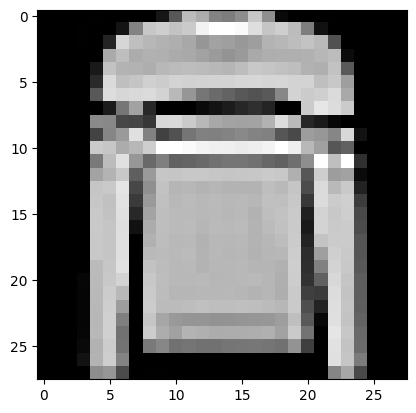

In [3]:
f_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = f_mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

plt.imshow(x_train[5], cmap="gray")

## Creación del modelo de aprendizaje

In [43]:
model = tf.keras.models.Sequential([

  tf.keras.layers.Input(shape=(28, 28)),

  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(256, activation='relu'),

  tf.keras.layers.Dropout(0.3),

  tf.keras.layers.Dense(128, activation='relu'),

  tf.keras.layers.Dropout(0.3),

  tf.keras.layers.Dense(32, activation='relu'),

  tf.keras.layers.Dense(10)
])

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 238,314 (930.91 KB)

 Trainable params: 238,314 (930.91 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [45]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss=loss_fn,
              metrics=['accuracy'])

## Entrenamiento y evaluación del modelo

In [46]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.6855 - loss: 0.8853
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8373 - loss: 0.4575
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8543 - loss: 0.3963
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.8607 - loss: 0.3823
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8683 - loss: 0.3582
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.8754 - loss: 0.3386
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.8777 - loss: 0.3311
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8828 - loss: 0.3172
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8827 - loss: 0.3153
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.8867 - loss: 0.3044


In [47]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.8781 - loss: 0.3423


[0.3423059284687042, 0.8780999779701233]

Se logró alcanzar un ~88% de exactitud, esto sin embargo puede mejorarse si se emplea una arquitectura de red neuronal convolucional.

In [48]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [49]:
probability_model(x_test[:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[1.6557613e-06, 8.1555946e-08, 1.3202377e-08, 2.9648463e-08,
        4.0767412e-10, 4.0924150e-04, 9.5662237e-08, 1.8757101e-02,
        4.4175343e-07, 9.8083133e-01]], dtype=float32)>

In [50]:
import numpy as np
np.argmax(probability_model(x_test[:1]))

9

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


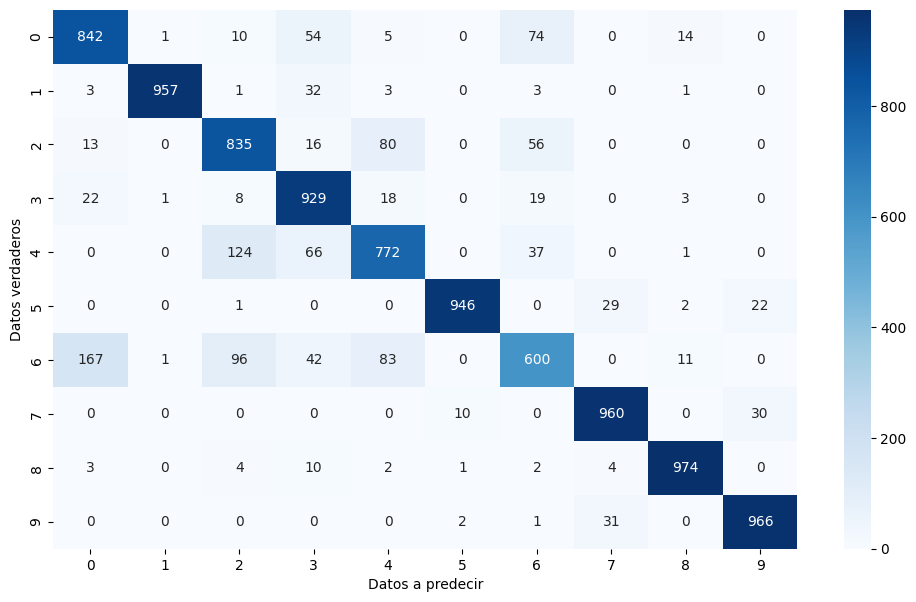

In [56]:
plt.figure(figsize=(12, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Datos a predecir')
plt.ylabel('Datos verdaderos')
plt.show()